In [1]:
import sys
sys.path.append('..')

import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
from src.processing.preprocessing import *

In [2]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = np.max(arr) - np.min(arr)    
    for i in arr:
        temp = (((i - np.min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return np.array(norm_arr)

In [3]:
def minmax(X, range=[0,1]):
    std = (X - X.min()) / (X.max() - X.min())
    scaled = std * (range[1] - range[0]) + range[0]
    return scaled

In [4]:
def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')

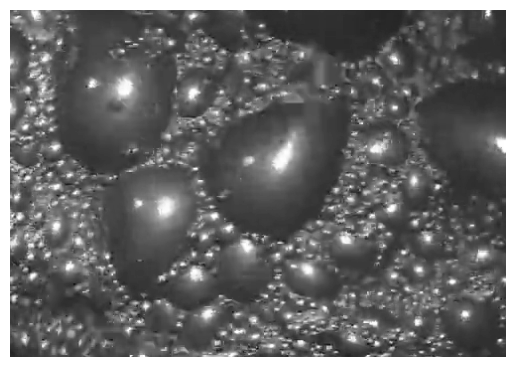

In [5]:
img = cv2.imread('../data/interim/F1_2_4_1.ts-frames/frame-125.png',0)
#img = cv2.imread('../data/interim/F1_2_2_1.ts-frames/frame-40.png', 0)
#img = cv2.imread('../data/split/test/F5_1_1_1.ts-frames_frame-265.png', 0)
img = img[100:450, 200:700]
n_img = normalize(img, 0, 1)
show_image(n_img)

(-0.5, 499.5, 349.5, -0.5)

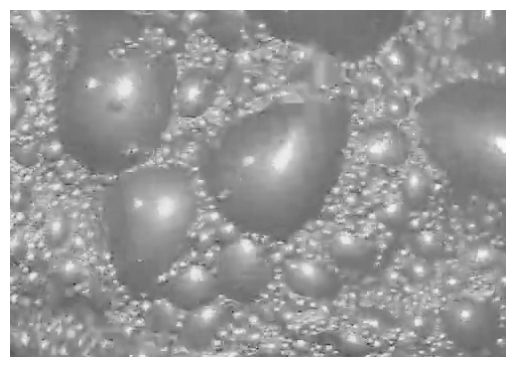

In [6]:
ssr_img = single_scale_retinex(img, 80).astype('float32')
plt.imshow(ssr_img, cmap='gray')
plt.axis('off')

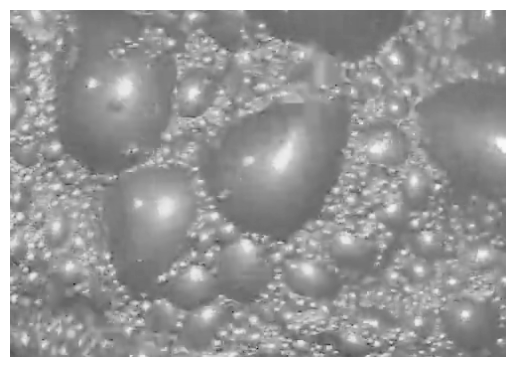

In [7]:
bf = bilateral_filtering(ssr_img, 8, 0.5, 0.5)
show_image(bf)

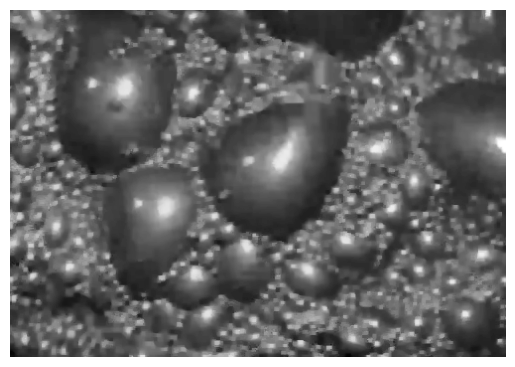

In [8]:
morphed = morphological_transform(bf)
show_image(morphed)

In [9]:
m = minmax(morphed.ravel(), [0, 255]).astype('uint8')
s = minmax(ssr_img.ravel(), [0, 255]).astype('uint8')
b = minmax(bf.ravel(), [0,255]).astype('uint8')

In [10]:
eq_m_hist = cv2.equalizeHist(m)

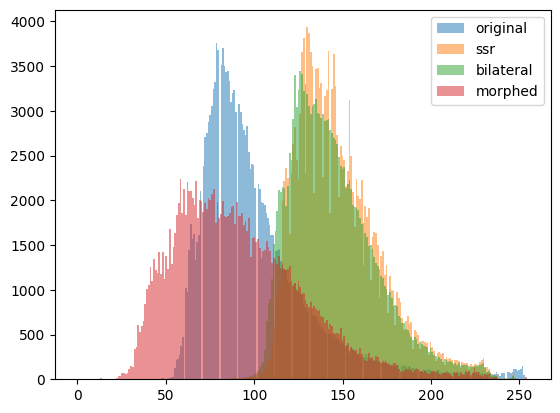

In [11]:
plt.hist(img.ravel(), 256, label="original", alpha=0.5)
plt.hist(s, 256, label="ssr", alpha=0.5)
plt.hist(b, 256, label="bilateral", alpha=0.5)
m_hist, m_bins, _ = plt.hist(m, 256, label="morphed", alpha=0.5)
#eq_hist, bins, _ = plt.hist(eq_m_hist.ravel(), 256, label="equalized m")

plt.legend()

122

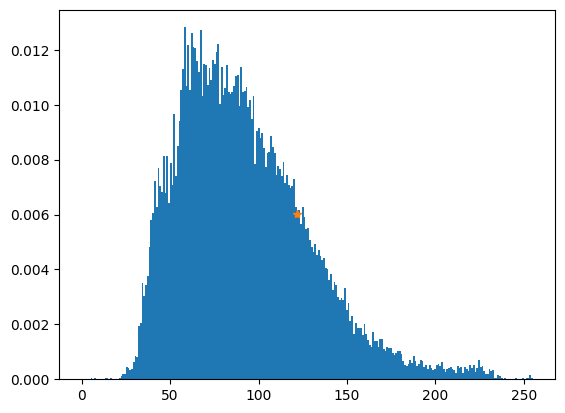

In [12]:
from src.processing.segmentation import get_weighted_otsu_threshold

m_hist, m_bins, _ = plt.hist(m, 256, label="morphed", density=True)
thresh, thresh_array = get_weighted_otsu_threshold(m)
plt.plot(thresh, m_hist[thresh],'*')
thresh

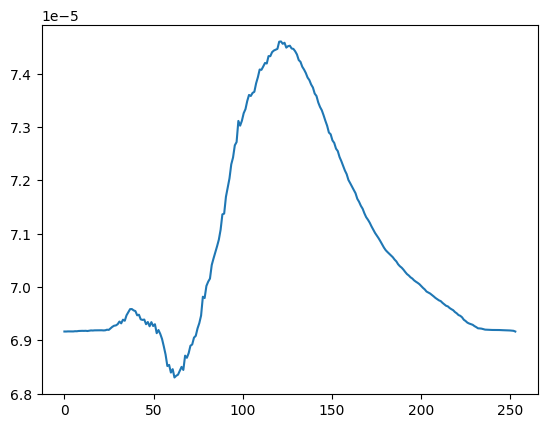

In [13]:
plt.plot(m_bins[:-2], thresh_array)

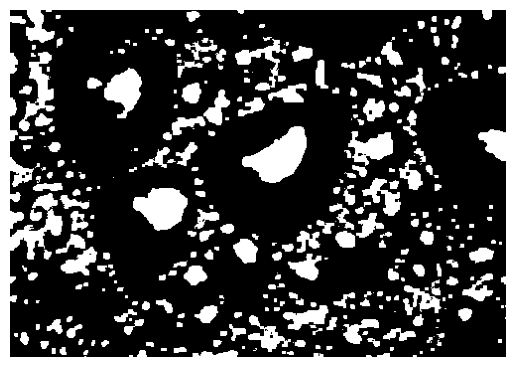

In [14]:
i = m.reshape(img.shape).astype('uint8')
_, tr = cv2.threshold(i, thresh, 255, cv2.THRESH_BINARY)
show_image(tr)